In [1]:
# installing dependencies 
# The train_test_split function is for splitting a single dataset for two different
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') 

In [2]:
# store the data in a dframe
df = pd.read_csv('NFLX.csv', delimiter=',', header=None, skiprows=1, names=['Date','Open','High','Low','Close','Adj Close','Volume'])
df

Date        Open        High         Low       Close   Adj Close  \
0     2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1     2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2     2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3     2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4     2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   
...          ...         ...         ...         ...         ...         ...   
1002  2019-12-10  296.119995  298.940002  292.019989  293.119995  293.119995   
1003  2019-12-11  294.489990  299.429993  294.200012  298.929993  298.929993   
1004  2019-12-12  295.670013  299.170013  295.059998  298.440002  298.440002   
1005  2019-12-13  298.500000  301.799988  297.250000  298.500000  298.500000   
1006  2019-12-16  300.850006  305.709991  298.630005  304.209991  304.209991   

        Volume  
0     13181000  
1     17284900  
2     17948100  
3     11670000  
4      9689000  
...        ...  
1002  10476100  
1003   5589800  
1004   4766600  
1005   3879700  
1006   4658900  

[1007 rows x 7 columns]

In [3]:
# show the first 10 rows
df.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4  2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   
5  2015-12-23  116.910004  118.559998  115.779999  118.160004  118.160004   
6  2015-12-24  118.220001  118.800003  117.300003  117.330002  117.330002   
7  2015-12-28  117.260002  117.349998  113.849998  117.110001  117.110001   
8  2015-12-29  118.190002  119.599998  116.919998  119.120003  119.120003   
9  2015-12-30  118.949997  119.019997  116.430000  116.709999  116.709999   

     Volume  
0  13181000  
1  17284900  
2  17948100  
3  11670000  
4   9689000  
5   9324300  
6   3531300  
7   8424300  
8   8159200  
9   8149700

In [4]:
# Get number of trained days in dataset
df.shape

(1007, 7)

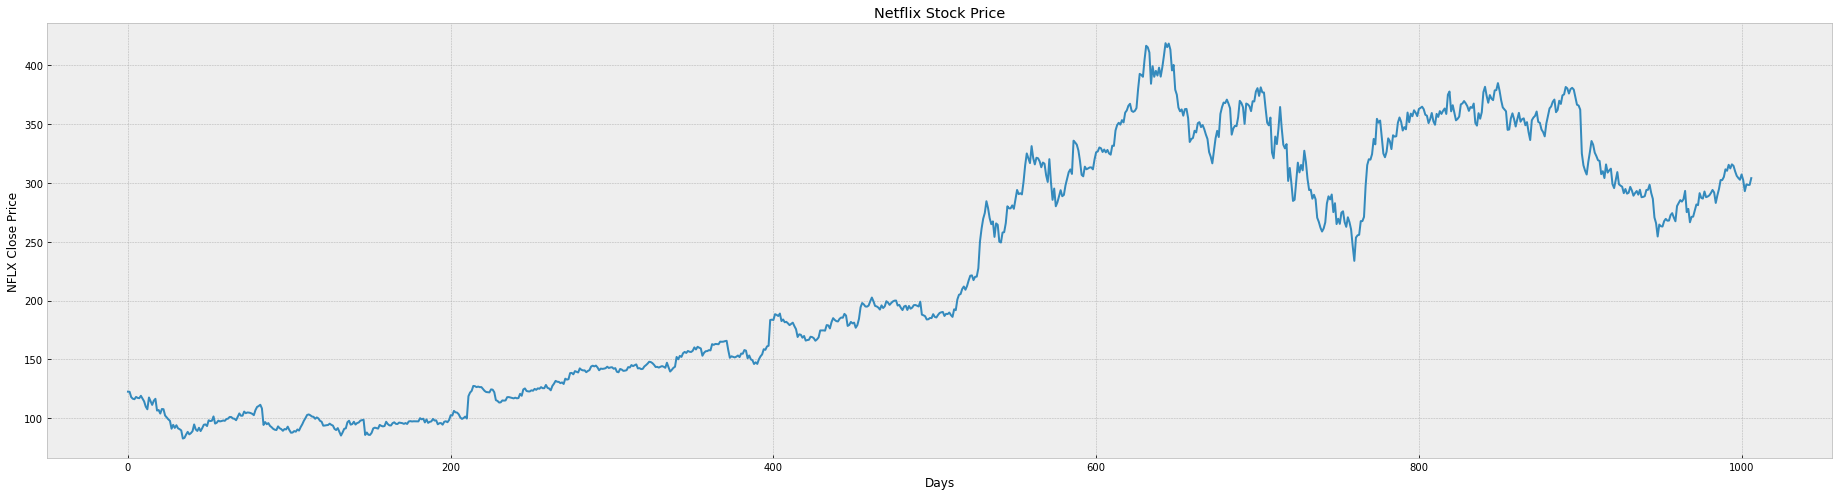

In [5]:
# Visualize the close price data 
plt.figure(figsize = (32, 8))
plt.title('Netflix Stock Price')
plt.xlabel('Days')
plt.ylabel('NFLX Close Price')
plt.plot(df['Close'])
plt.show()

In [6]:
# Get the Close price
df = df[['Close']]
df.head(10)

Close
0  122.639999
1  122.510002
2  118.019997
3  116.629997
4  116.239998
5  118.160004
6  117.330002
7  117.110001
8  119.120003
9  116.709999

In [7]:
df.shape

(1007, 1)

In [8]:
# Predict n days into the future
future_days = 10
# Create a new column target data - Predict values n days away from current price
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

C:\Users\Saloni Choudhary\AppData\Local\Temp\ipykernel_56820\3869758055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


Close  Prediction
0  122.639999  114.379997
1  122.510002  109.959999
2  118.019997  107.660004
3  116.629997  117.680000

In [9]:
# check the end shift
df.tail(10)

Close  Prediction
997   306.160004         NaN
998   304.320007         NaN
999   302.859985         NaN
1000  307.350006         NaN
1001  302.500000         NaN
1002  293.119995         NaN
1003  298.929993         NaN
1004  298.440002         NaN
1005  298.500000         NaN
1006  304.209991         NaN

In [10]:
# Create a feature dataset and create a numpy array and remove the NaN days/rows 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)



[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

C:\Users\Saloni Choudhary\AppData\Local\Temp\ipykernel_56820\1514103166.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [11]:
# Create target set
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[114.379997 109.959999 107.660004 117.68     114.559998 111.389999
 114.970001 116.580002 106.559998 107.059998 104.040001 107.889999
 107.739998 102.349998 100.720001  99.120003  97.830002  91.150002
  94.410004  91.839996  94.089996  91.489998  90.739998  89.709999
  82.790001  83.32      86.129997  88.449997  86.349998  87.400002
  89.050003  94.760002  90.489998  89.230003  91.93      89.120003
  91.610001  94.529999  94.790001  93.410004  98.300003  97.610001
  97.93     101.580002  95.489998  96.230003  98.        97.360001
  97.660004  98.129997  97.860001  99.349998  99.720001 101.120003
 101.059998  99.839996  99.589996  98.360001 101.209999 104.129997
 102.190002 102.230003 105.699997 104.349998 104.940002 104.830002
 104.449997 103.809998 102.68     106.980003 109.650002 110.419998
 111.510002 108.400002  94.339996  96.769997  94.980003  95.900002
  93.559998  92.43      91.040001  90.279999  90.029999  93.110001
  91.540001  90.790001  89.370003  90.839996  90.540001  92.88

In [12]:
# train and test ratio is 7:3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [13]:
# Create models
# Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression Model
linr = LinearRegression().fit(x_train, y_train) 

In [14]:
# Get x rows on future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Saloni Choudhary\AppData\Local\Temp\ipykernel_56820\3587538840.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[302.570007],
       [302.600006],
       [305.160004],
       [311.690002],
       [310.480011],
       [315.549988],
       [312.48999 ],
       [315.929993],
       [314.660004],
       [309.98999 ]])

In [15]:
# Prediction model for Decision Tree Regressor
tree_prediction = tree.predict(x_future)
print(x_future)

[[302.570007]
 [302.600006]
 [305.160004]
 [311.690002]
 [310.480011]
 [315.549988]
 [312.48999 ]
 [315.929993]
 [314.660004]
 [309.98999 ]]


In [16]:
# Prediction model for Linear Regression model
linear_prediction = linr.predict(x_future)
print(x_future)

[[302.570007]
 [302.600006]
 [305.160004]
 [311.690002]
 [310.480011]
 [315.549988]
 [312.48999 ]
 [315.929993]
 [314.660004]
 [309.98999 ]]


C:\Users\Saloni Choudhary\AppData\Local\Temp\ipykernel_56820\3349000476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


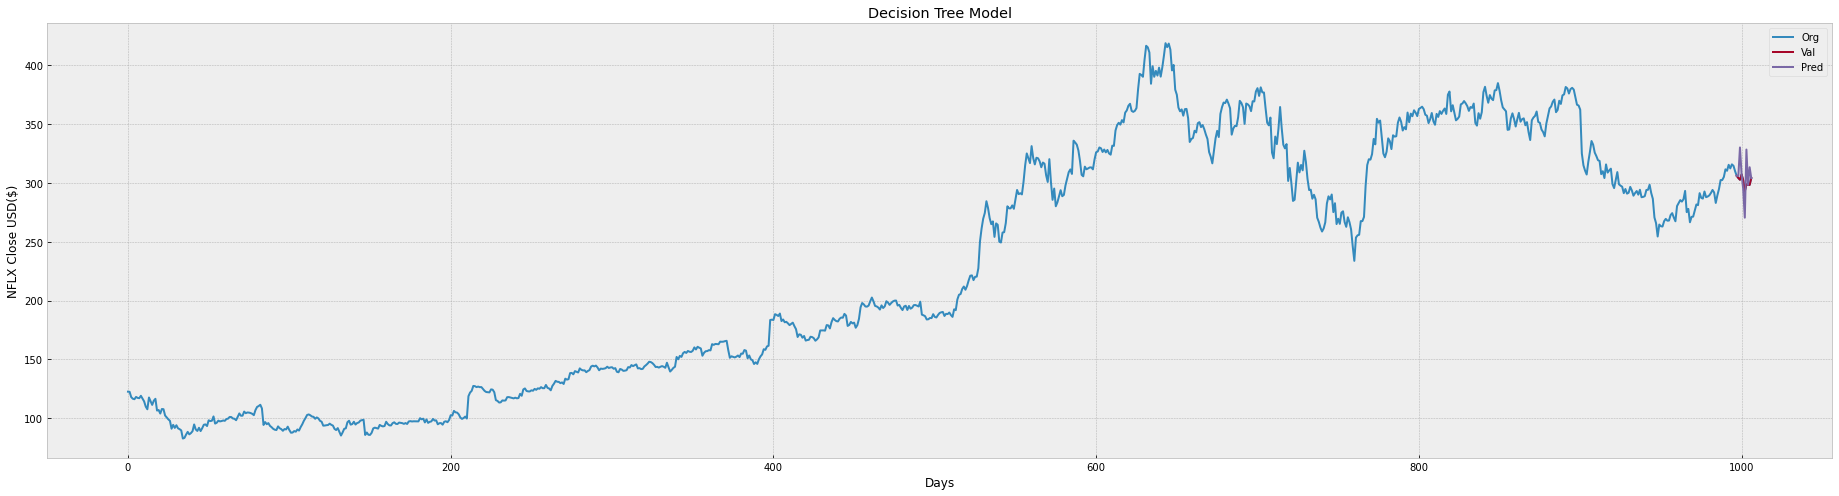

In [17]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('NFLX Close USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()

C:\Users\Saloni Choudhary\AppData\Local\Temp\ipykernel_56820\2300671428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


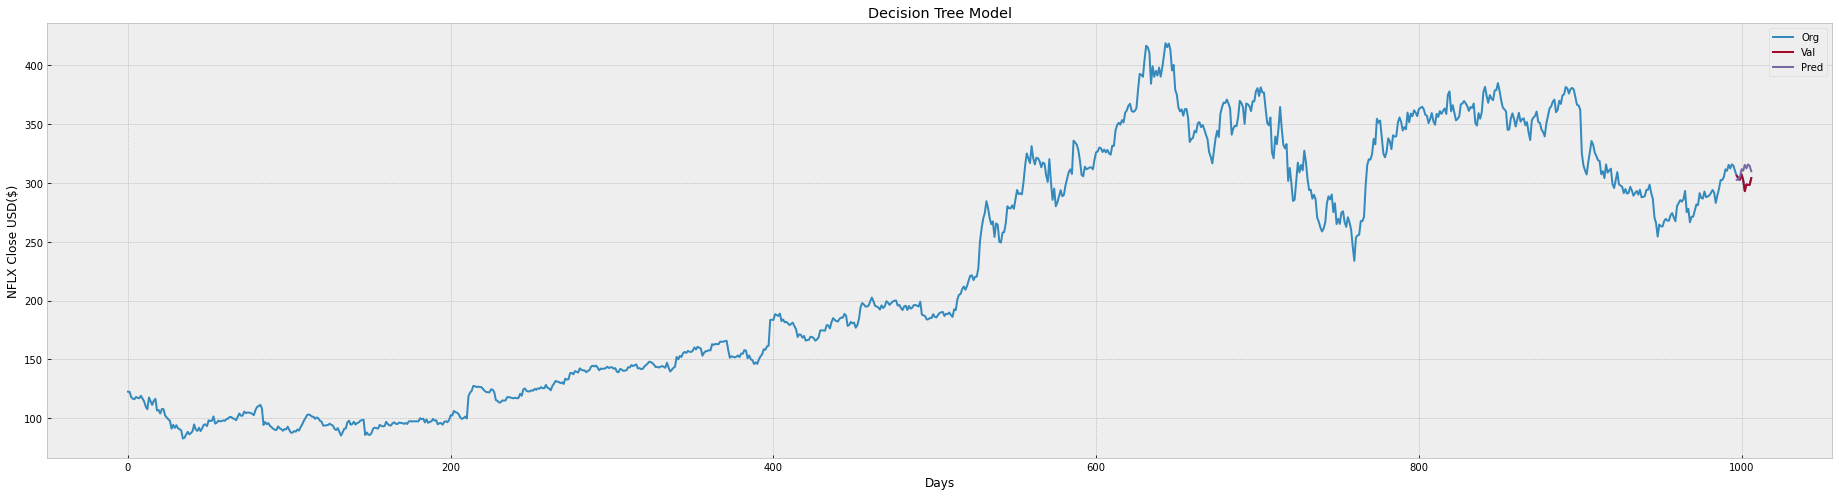

In [18]:
# Visualize the data 
predictions = linear_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('NFLX Close USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()